<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/pp_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [70]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [71]:
import warnings

warnings.filterwarnings('ignore')

input

In [72]:
df = pd.read_csv("pp_aug.csv")

exploratory

In [73]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Knowledge        1238 non-null   int64
 1   Problem Solving  1238 non-null   int64
 2   Interaction      1238 non-null   int64
 3   Impact           1238 non-null   int64
 4   Accountability   1238 non-null   int64
dtypes: int64(5)
memory usage: 48.5 KB


In [74]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,52,20,27,30,0
1,52,20,27,30,0
2,52,20,27,30,0
3,52,27,27,30,0
4,52,27,27,30,0


checks

In [75]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,136.269790,50.994346,55.553312,108.307754,24.983037
std,67.975767,20.687203,22.178084,46.936736,19.355472
min,52.000000,15.000000,27.000000,30.000000,0.000000
25%,75.000000,36.000000,36.000000,64.000000,0.000000
50%,148.000000,48.000000,52.000000,116.000000,25.000000
75%,181.000000,65.000000,66.000000,142.000000,40.000000
max,300.000000,117.000000,129.000000,260.000000,75.000000


In [76]:
X=df

Scaling

In [77]:
cols = X.columns

In [78]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [79]:
X = pd.DataFrame(X, columns=[cols])

In [80]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.0,0.049020,0.0,0.0,0.0
1,0.0,0.049020,0.0,0.0,0.0
2,0.0,0.049020,0.0,0.0,0.0
3,0.0,0.117647,0.0,0.0,0.0
4,0.0,0.117647,0.0,0.0,0.0


In [81]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.000000,0.049020,0.000000,0.000000,0.000000
1,0.000000,0.049020,0.000000,0.000000,0.000000
2,0.000000,0.049020,0.000000,0.000000,0.000000
3,0.000000,0.117647,0.000000,0.000000,0.000000
4,0.000000,0.117647,0.000000,0.000000,0.000000
...,...,...,...,...,...
1233,0.673387,0.490196,0.215686,0.660870,0.706667
1234,0.830645,0.705882,0.558824,0.921739,0.560000
1235,1.000000,0.490196,0.382353,1.000000,0.800000
1236,0.830645,0.705882,0.558824,0.921739,0.733333


K means

In [82]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [83]:
kmeans.cluster_centers_

array([[0.18693982, 0.27393236, 0.17580528, 0.23976507, 0.22605207],
       [0.60102703, 0.48781482, 0.45788819, 0.51256779, 0.51606127]])

inertia

In [84]:
kmeans.inertia_

204.93326875764984

Elbow

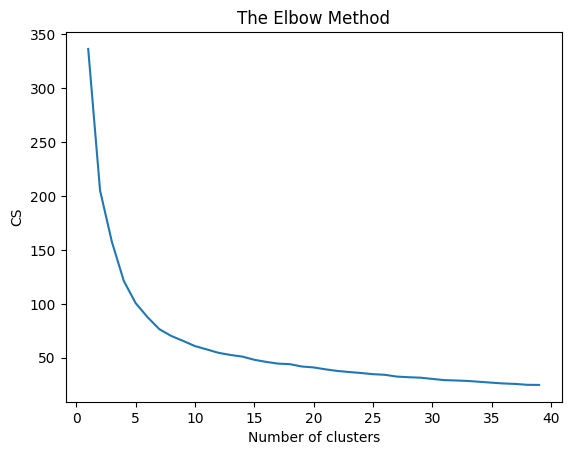

In [85]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

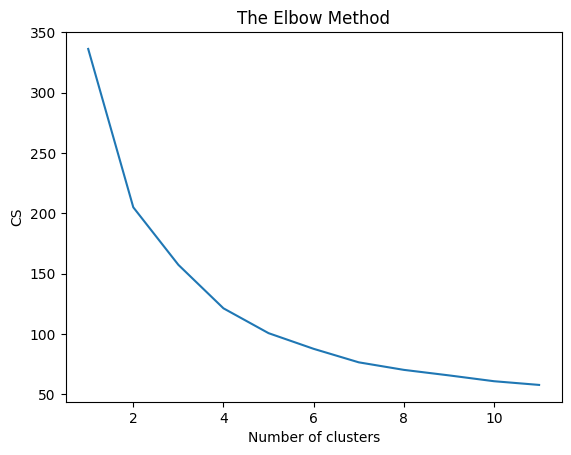

In [86]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [185]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [186]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('pp_aug_l.csv')
print(labels)

[2 2 2 ... 1 1 1]


In [187]:
Z=kmeans.cluster_centers_
Z

array([[0.13377073, 0.39525867, 0.0845519 , 0.3658929 , 0.46048964],
       [0.68900053, 0.54091932, 0.48367085, 0.58218104, 0.54430601],
       [0.04703172, 0.1956665 , 0.10413577, 0.14934235, 0.01932773],
       [0.44567685, 0.25044563, 0.42323616, 0.2312763 , 0.23096774]])

In [188]:
import matplotlib

In [193]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=400)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 1238 samples in 0.002s...
[t-SNE] Computed neighbors for 1238 samples in 0.063s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1238
[t-SNE] Computed conditional probabilities for sample 1238 / 1238
[t-SNE] Mean sigma: 0.143687
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.083374
[t-SNE] KL divergence after 2300 iterations: 0.264529


In [194]:
np.unique(labels)


array([0, 1, 2, 3], dtype=int32)

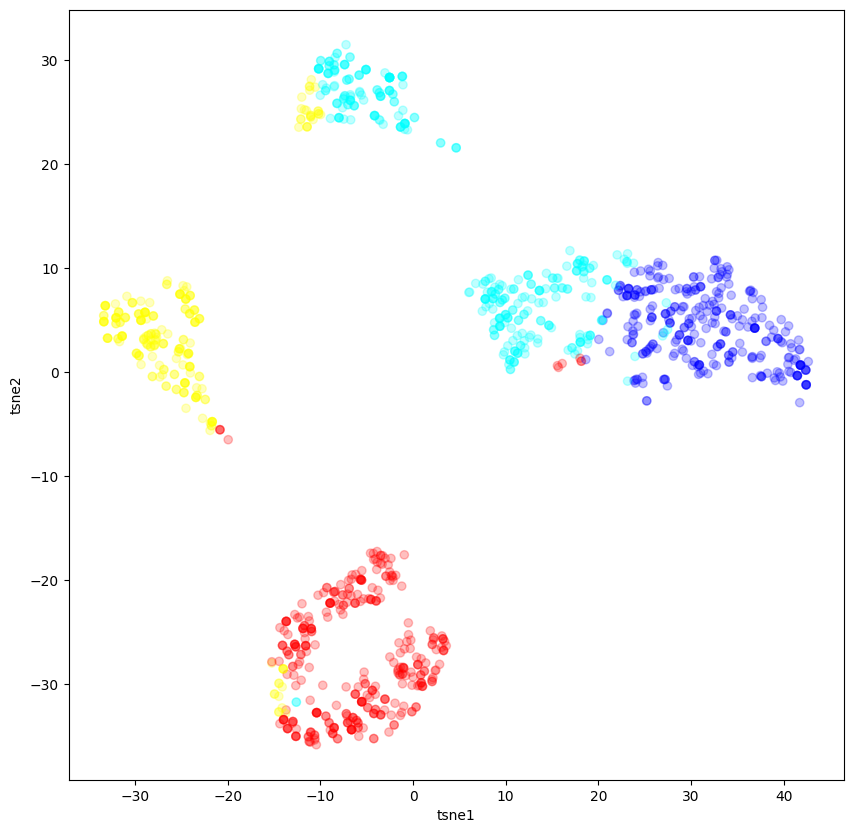

In [195]:
colors = ["red","green","blue","purple","yellow","cyan"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [196]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_pp_aug.csv')
Z2

array([[ 85.17514124,  55.31638418,  35.62429379, 114.15536723,
         34.53672316],
       [222.87213115,  70.17377049,  76.33442623, 163.90163934,
         40.82295082],
       [ 63.66386555,  34.95798319,  37.62184874,  64.3487395 ,
          1.44957983],
       [162.52785924,  40.54545455,  70.17008798,  83.19354839,
         17.32258065]])